In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_clipboard()

In [3]:
df.sample(5)

,v1,v2
129,ham,K..k:)how much does it cost?
5353,ham,Guai... ÌÏ shd haf seen him when he's naughty....
1207,ham,I need you to be in my strong arms...
3877,ham,What you need. You have a person to give na.
3528,spam,Xmas & New Years Eve tickets are now on sale f...


In [4]:
df.shape

(5572, 2)

# DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.rename(columns= {'v1' : "Target",'v2' : 'Text'}, inplace =True)  #changing the column name
df.sample(5)

,Target,Text
991,ham,Hi im having the most relaxing time ever! we h...
1653,ham,I was at bugis juz now wat... But now i'm walk...
2127,ham,Tessy..pls do me a favor. Pls convey my birthd...
4148,ham,Haven't found a way to get another app for you...
2412,spam,I don't know u and u don't know me. Send CHAT ...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['Target']=encoder.fit_transform(df['Target'])

In [9]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum() #check missing values

Target    0
Text      0
dtype: int64

In [11]:
df.duplicated().sum() #duplicate value checking

403

In [12]:
df = df.drop_duplicates(keep = 'first') #remove duplicates text

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

# EXPLORATORY DATA ANALYSIS

In [15]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

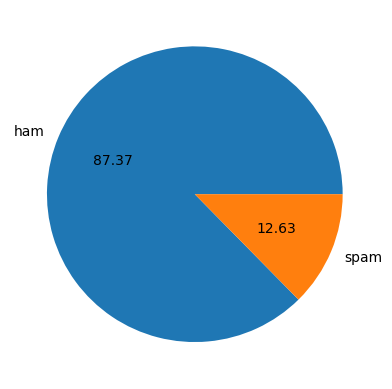

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels = ['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
import nltk

In [19]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['Text'].apply(len) #number of characters in indivual text
df.sample(5)

,Target,Text,num_characters
3491,0,I will reach office around &lt;DECIMAL&gt; . ...,126
3870,0,Yeah my usual guy's out of town but there're d...,76
4093,0,how are you? I miss you!,24
4304,0,Yo come over carlos will be here soon,37
5031,0,Ok i vl..do u know i got adsense approved..,43


In [22]:
df['num_words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x))) #number of words in indivual text 
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x))) #number of sentences in indivual text 
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [25]:
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe() #ham messages describing

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe() #sham messages describing

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [27]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

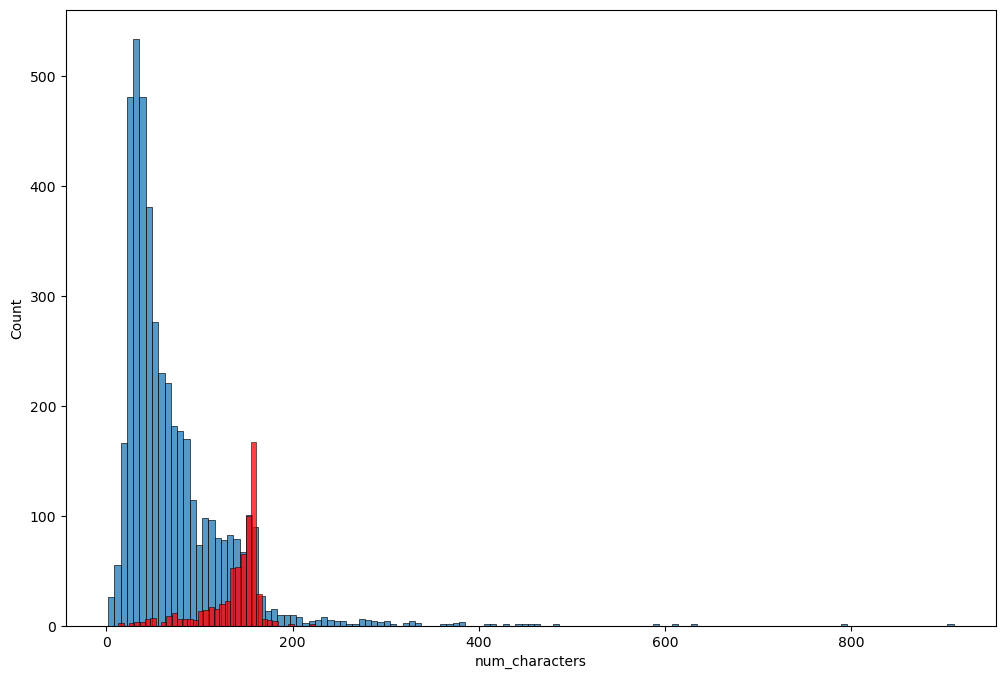

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

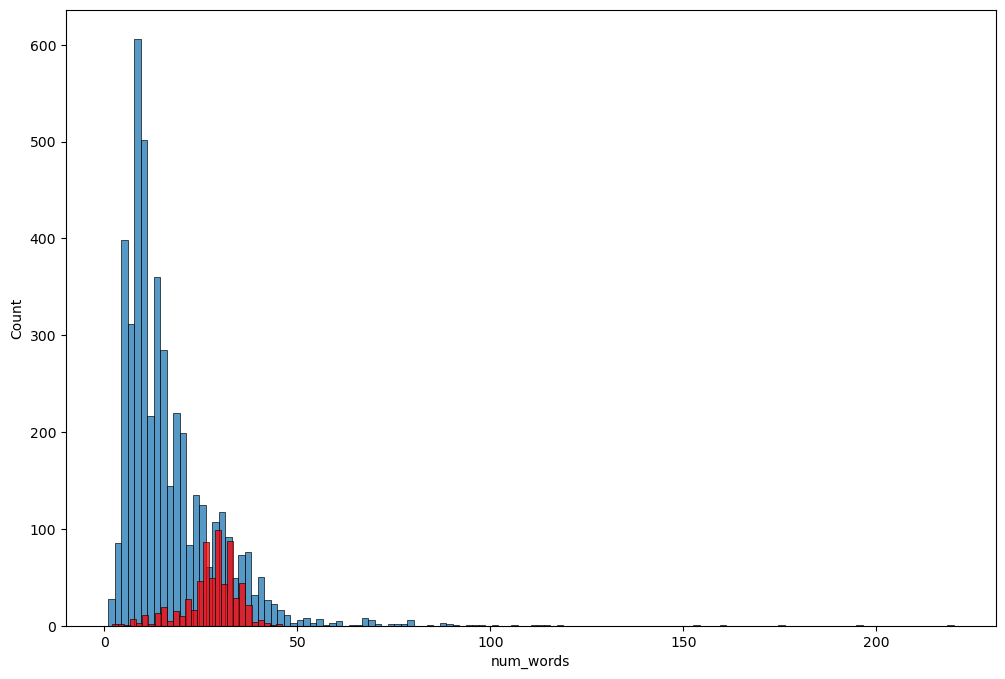

In [29]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color='red')

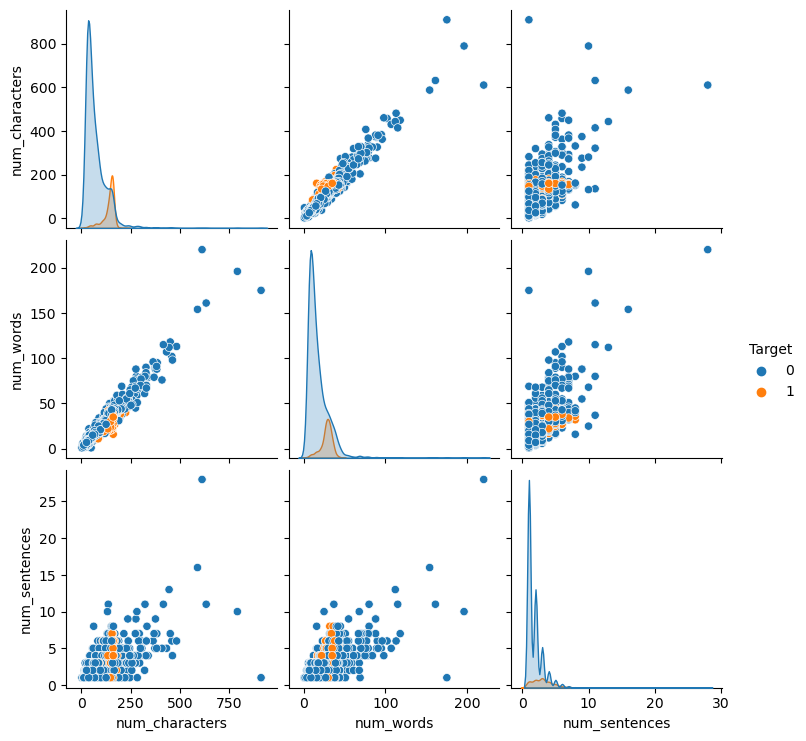

In [30]:
sns.pairplot(df,hue = 'Target')

<AxesSubplot:>

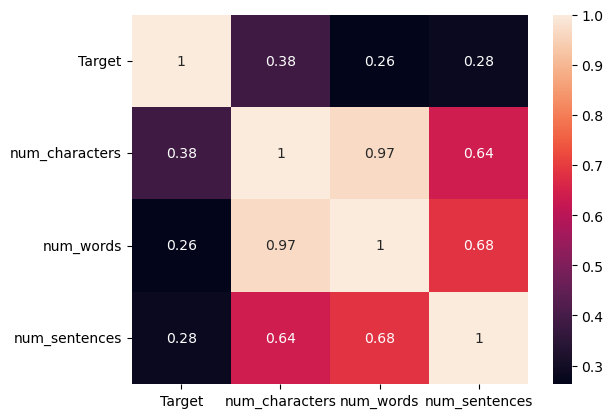

In [31]:
sns.heatmap(df.corr(),annot = True)

# Data Preprocessing


In [32]:
def transform_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    
    y =[]
    for i in Text:
        if i.isalnum():
            y.append(i)
    
    
    Text = y[:]
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
   
    
    Text = y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)
    

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
df['Text'][2023]

'Is there any movie theatre i can go to and watch unlimited movies and just pay once?'

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [38]:
transform_text('Is there any movie theatre i can go to and watch unlimited movies and just pay once?')

'movi theatr go watch unlimit movi pay'

In [39]:
df['Transformed_Text'] = df['Text'].apply(transform_text)

In [40]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size = 10, background_color='white')

In [49]:
!pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable


In [42]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_Text'].str.cat(sep = ""))

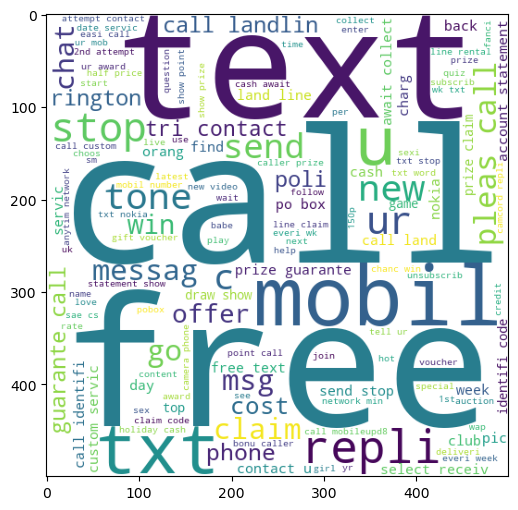

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_Text'].str.cat(sep = ""))

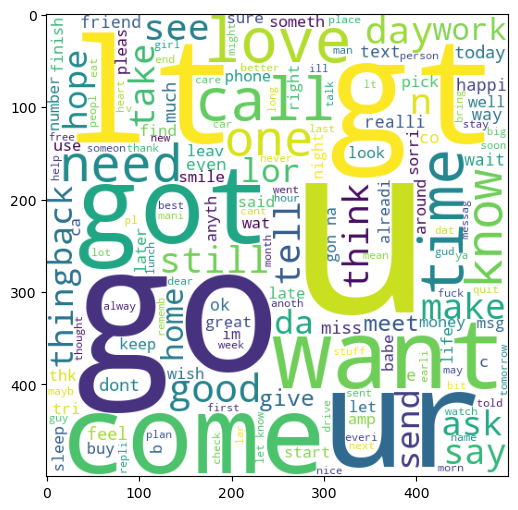

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [46]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

9939

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


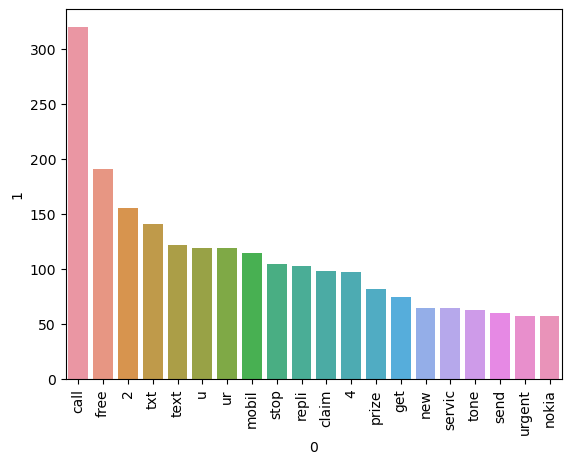

In [49]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [50]:
ham_corpus = []
for msg in df[df['Target'] == 0]['Transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

35394

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


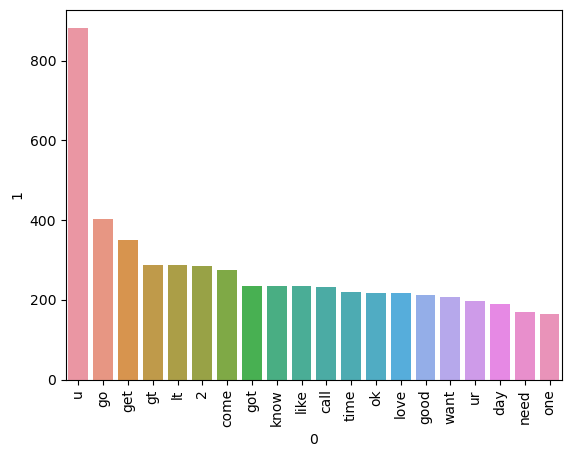

In [52]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features =3000)

In [54]:
X = tfidf.fit_transform(df['Transformed_Text']).toarray()

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [56]:
X.shape

(5169, 3000)

In [57]:
y = df['Target'].values

In [58]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state = 2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [64]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [65]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import  XGBClassifier

In [67]:
svc = SVC(kernel= 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc  = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb =  XGBClassifier()

In [68]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XGB' : xgb
}

In [69]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [70]:
train_classifier(svc, X_train,y_train,X_test,y_test)

(0.9661508704061895, 0.9256198347107438)

In [71]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For", name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9661508704061895
Precision -  0.9256198347107438


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For DT
Accuracy -  0.9303675048355899
Precision -  0.8367346938775511
For LR
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For RF
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For BgC
Accuracy -  0.9574468085106383
Precision -  0.8790322580645161
For ETC
Accuracy -  0.97678916827853
Precision -  0.975
For GBDT
Accuracy -  0.9564796905222437
Precision -  0.9345794392523364
For XGB
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [72]:
performance_df = pd.DataFrame({'Algorithm'  : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision',ascending = False)

In [73]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.977756,0.983193
4,LR,0.974855,0.982759
1,KN,0.905222,0.976190
8,ETC,0.976789,0.975000
2,NB,0.978723,0.946154
6,AdaBoost,0.961315,0.945455
10,XGB,0.972921,0.943548
9,GBDT,0.956480,0.934579
0,SVC,0.966151,0.925620
7,BgC,0.957447,0.879032


In [74]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [75]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.977756
1,LR,Accuracy,0.974855
2,KN,Accuracy,0.905222
3,ETC,Accuracy,0.976789
4,NB,Accuracy,0.978723
5,AdaBoost,Accuracy,0.961315
6,XGB,Accuracy,0.972921
7,GBDT,Accuracy,0.956480
8,SVC,Accuracy,0.966151
9,BgC,Accuracy,0.957447


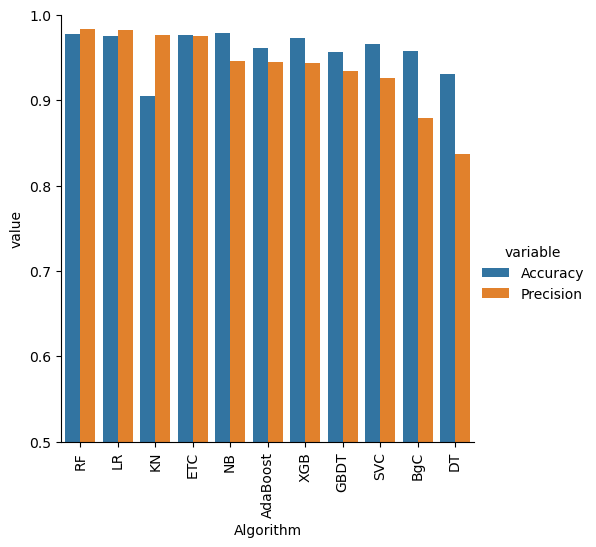

In [76]:
sns.catplot(x = 'Algorithm', y = 'value',
           hue = 'variable', data = performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [77]:
temp_df = pd.DataFrame({'Algorithm' :clfs.keys(),'Accuracy_max_ft_3000' : accuracy_scores, 'Precision_max_fit_3000' : precision_scores}).sort_values('Precision_max_fit_3000',ascending = False)

In [78]:
new_df = performance_df.merge(temp_df,on = 'Algorithm')

In [79]:
scaler_df = pd.DataFrame({'Algorithm' :clfs.keys(),'Accuracy_scaling' : accuracy_scores, 'Precision_scaling' : precision_scores}).sort_values('Precision_scaling',ascending = False)

In [80]:
scaler_df = new_df.merge(scaler_df, on = 'Algorithm')

In [81]:
scaler_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_fit_3000,Accuracy_scaling,Precision_scaling
0,RF,0.977756,0.983193,0.977756,0.983193,0.977756,0.983193
1,LR,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
2,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
3,ETC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
4,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
5,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
6,XGB,0.972921,0.943548,0.972921,0.943548,0.972921,0.943548
7,GBDT,0.956480,0.934579,0.956480,0.934579,0.956480,0.934579
8,SVC,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620
9,BgC,0.957447,0.879032,0.957447,0.879032,0.957447,0.879032


In [82]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

# Thanks for your valuable time...